In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
color=sns.color_palette()
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
%matplotlib inline


## Positive Correlation

In [2]:
np.random.seed(1)
df=pd.DataFrame()
df['x']=np.random.randint(0,50,100)
df['y']=df['x']+np.random.normal(0,5,100)
df.head()

,x,y
0,37,40.196524
1,43,43.237630
2,12,27.574168
3,8,5.337692
4,9,10.727918


In [3]:
np.random.seed(1)
x=np.random.normal(0,5,100)

In [4]:
print('Correlation between x and y:', df['x'].corr(df['y']))

Correlation between x and y: 0.9377576725809027


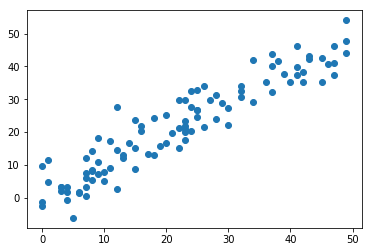

each value in x is i more than the value in y where i is any value between [0,5]


In [5]:
plt.scatter(df['x'],df['y'])
plt.show()
print('each value in x is i more than the value in y where i is any value between [0,5]')

## Negative correlation

Correlation betwwen x and y is:  -0.9556071816376538


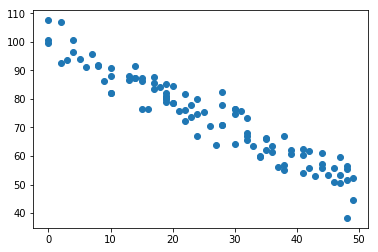

In [6]:
df=pd.DataFrame()
df['x']=np.random.randint(0,50,100)
df['y']=100-df['x']+np.random.normal(0,5,100)
print('Correlation betwwen x and y is: ', df['x'].corr(df['y']))
plt.scatter(df['x'],df['y'])
plt.show()


## No/weak Correlation

Correlation between x and y is:  0.06688523221009278


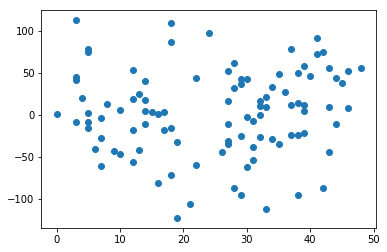

In [7]:
df=pd.DataFrame()
df['x']=np.random.randint(0,50,100)
df['y']=np.random.normal(0,50,100)
print('Correlation between x and y is: ', df['x'].corr(df['y']))
plt.scatter(df['x'],df['y'])
plt.show()

In [8]:
df=pd.read_csv(r'D:\marlabs\Datasets\walmart_stock.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


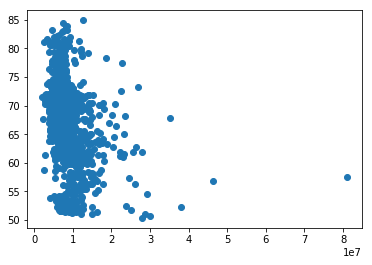

In [10]:
plt.scatter(df[df.columns[5]],df[df.columns[6]])

In [11]:
df['Volume'].corr(df['Adj Close'])

-0.31867529308373793

In [12]:
df['Volume'].corr(df['Adj Close'],method='spearman')

-0.3975296930105012

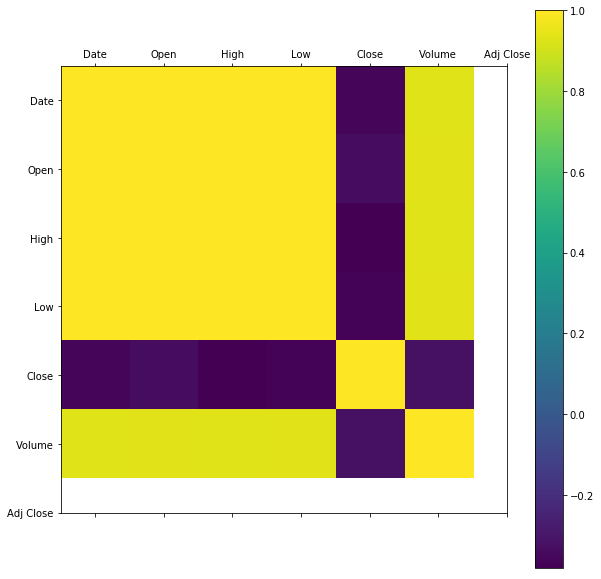

In [13]:
from pylab import rcParams
rcParams['figure.figsize']=5,10
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)),df.columns)
plt.yticks(range(len(df.columns)),df.columns)
plt.colorbar()
plt.show()

In [18]:
np.random.seed(20)
x=np.arange(20)
y_corr=[2*xx +np.random.rand(1) for xx in range(20)]
y_uncorr=np.sin(x)

x_reshape=x.reshape(-1,1)


In [19]:
print(x)
x.reshape(-1,1)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19]])

In [23]:
linear_corr=LinearRegression()
linear_corr.fit(x_reshape,y_corr)
pred_corr=linear_corr.predict(x_reshape)

linear_uncorr=LinearRegression()
linear_uncorr.fit(x_reshape,y_uncorr)
pred_uncorr=linear_uncorr.predict(x_reshape)


In [26]:
pred_uncorr
print(pred_corr)

[[ 0.6882285 ]
 [ 2.67087821]
 [ 4.65352792]
 [ 6.63617763]
 [ 8.61882734]
 [10.60147705]
 [12.58412676]
 [14.56677647]
 [16.54942618]
 [18.53207589]
 [20.5147256 ]
 [22.49737531]
 [24.48002502]
 [26.46267473]
 [28.44532444]
 [30.42797415]
 [32.41062386]
 [34.39327357]
 [36.37592328]
 [38.35857299]]


In [27]:
y_corr

[array([0.5881308]),
 array([2.89771373]),
 array([4.89153073]),
 array([6.81583748]),
 array([8.03588959]),
 array([10.69175758]),
 array([12.37868094]),
 array([14.51851095]),
 array([16.65795147]),
 array([18.19385022]),
 array([20.2723164]),
 array([22.71860593]),
 array([24.78300361]),
 array([26.85032764]),
 array([28.77524489]),
 array([30.03666431]),
 array([32.11669374]),
 array([34.7512807]),
 array([36.23921822]),
 array([38.25480601])]

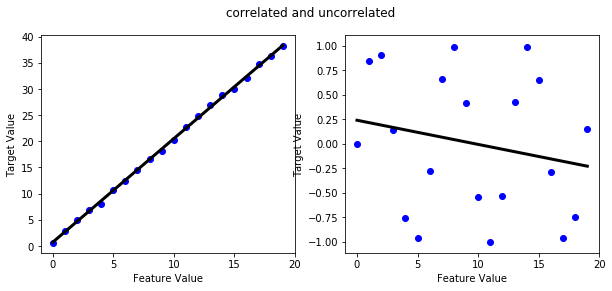

In [51]:
fig,(ax1,ax2)=plt.subplots(1,2,sharex=False,sharey=False,figsize=(10,4))
fig.suptitle('correlated and uncorrelated')
ax1.scatter(x_reshape,y_corr, color ='blue')
ax1.plot(x_reshape,pred_corr,color='black',linewidth=3)
ax1.set_xlabel('Feature Value',fontdict=None,labelpad=None)
ax1.set_ylabel('Target Value',fontdict=None,labelpad=None)

ax2.scatter(x_reshape,y_uncorr,color='blue')
ax2.plot(x_reshape,pred_uncorr,color='black',linewidth=3)
plt.xlabel('Feature Value',fontdict=None,labelpad=None)
plt.ylabel('Target Value',fontdict=None,labelpad=None)
plt.show()



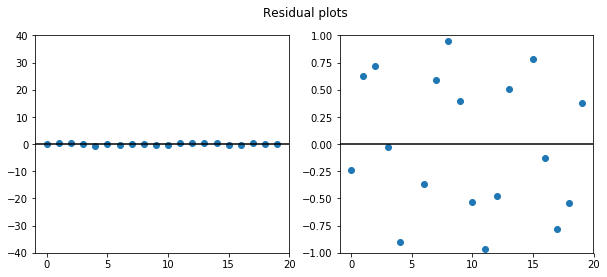

In [50]:
fig,(ax1,ax2)=plt.subplots(1,2,sharex=False,sharey=False,figsize=(10,4))
fig.suptitle('Residual plots')
ax1.set_ylim(-40,40)
ax1.axhline(y=0,color='k')
residuals_corr=(y_corr-pred_corr)
ax1.scatter(x,residuals_corr)

ax2.set_ylim(-1,1)
ax2.axhline(y=0,color='k')
residuals_uncorr=(y_uncorr-pred_uncorr)
ax2.scatter(x,residuals_uncorr)

## Homo Hetero scedacity

In [41]:
np.random.seed(20)
x = np.arange(20)
y_homo = [xx*2 + np.random.rand(1) for xx in range(20)] ## homoscedastic error
y_hetero = [xh*2 + np.random.rand(1)*2*xh for xh in range(20)] ## heteroscedastic error
x_reshape = x.reshape(-1,1)
linear_homo = LinearRegression()
linear_homo.fit(x_reshape, y_homo)
pred_homo = linear_homo.predict(x_reshape)

linear_hetero = LinearRegression()
linear_hetero.fit(x_reshape, y_hetero)
pred_hetero = linear_hetero.predict(x_reshape)

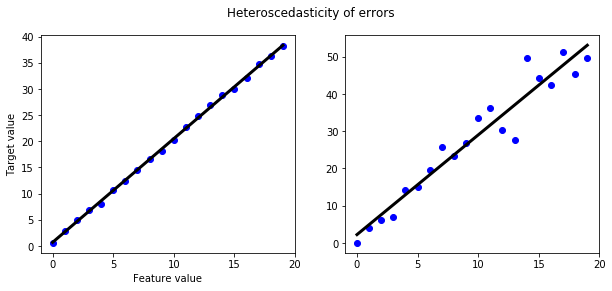

In [49]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False,figsize= (10,4), sharey=False )
fig.suptitle('Heteroscedasticity of errors')
ax1.scatter(x_reshape,y_homo, color='blue')
ax1.plot(x_reshape, pred_homo, color='black', linewidth=3)
#ax1.ylim([0,60])
#ax1.xlim([-1.0,21.5])
#ax1.xticks(())
#ax1.yticks(())
ax1.set_xlabel('Feature value', fontdict=None, labelpad=None)
ax1.set_ylabel('Target value', fontdict=None, labelpad=None)
ax2.scatter(x_reshape,y_hetero, color='blue')
ax2.plot(x_reshape, pred_hetero, color='black', linewidth=3)
plt.show()

Text(0.5, 0, 'predicted values')

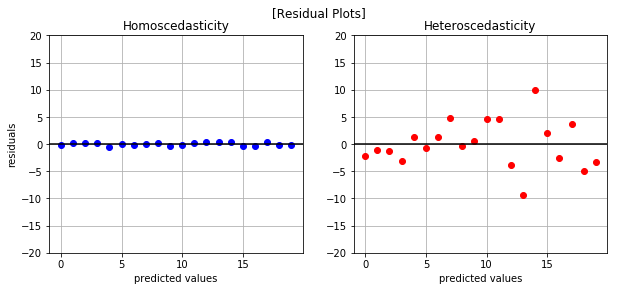

In [48]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False , figsize =(10,4))
fig.suptitle('[Residual Plots]')
axes[0].set_ylim(-20,20)
axes[0].plot(x, y_homo-pred_homo, 'bo') #plotted predicted and residuals
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Homoscedasticity')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].set_ylim(-20,20)
axes[1].plot(x, y_hetero-pred_hetero, 'ro') #plotted predicted and residuals
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Heteroscedasticity')
axes[1].set_xlabel('predicted values')

In [45]:
# To overcome the hetroscedacity we are doing log transform here
y_hetero_log = np.log10(np.array(y_hetero) + 1e1)
x_reshape_log = np.log10(np.array(x_reshape) + 1e1)
linear_hetero_log = LinearRegression()
linear_hetero_log.fit(x_reshape, y_hetero_log)
pred_log_hetero = linear_hetero_log.predict(x_reshape)

Text(0.5, 0, 'predicted values')

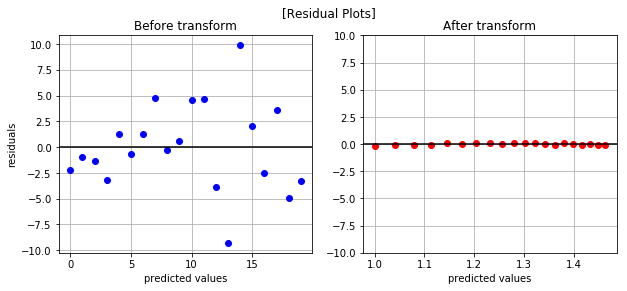

In [47]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False , figsize = (10,4))
fig.suptitle('[Residual Plots]')
axes[0].plot(x, y_hetero-pred_hetero, 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Before transform')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].set_ylim(-10,10)
axes[1].plot(x_reshape_log, y_hetero_log-pred_log_hetero, 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('After transform')
axes[1].set_xlabel('predicted values')

In [60]:
import numpy as np
np.random.seed(20)
x = np.arange(20)
#print x
y = [xx*2 + np.random.rand(1)*4 for xx in range(20)]
y_linear_leverage = np.copy(y)
y_linear_leverage[18] = np.array([55]) ## high-leverage point
y_linear_leverage[19] = np.array([58]) ## high-leverage point
#y_linear_leverage1 = [xx*2 + np.random.rand(1)*4 for xx in range(20)]
#y_linear_leverage1[18] = np.array([55]) ## high-leverage point
#y_linear_leverage1[19] = np.array([58]) ## high-leverage point
#print y_linear_leverage
#print y_linear_leverage1

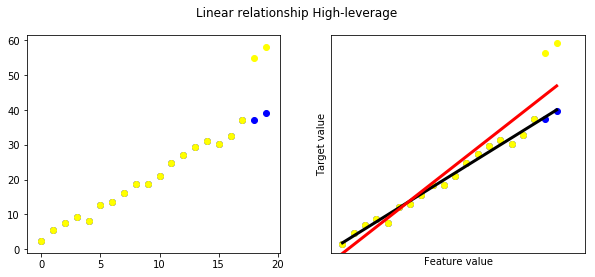

In [65]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# sklearn expects 2D array so have to reshape x
x_reshape = x.reshape(-1,1)
# fit model w/standard data
no_leverage = LinearRegression()
no_leverage.fit(x_reshape, y)
pred_no_lev = no_leverage.predict(x_reshape)
# fit model w/liverage data
linear_leverage = LinearRegression()
linear_leverage.fit(x_reshape, y_linear_leverage)
pred_leverage = linear_leverage.predict(x_reshape)
# Plot outputs
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False , figsize = (10,4
))
fig.suptitle('Linear relationship High-leverage')
ax1.scatter(x_reshape,y, color='blue')
ax1.scatter(x_reshape,y_linear_leverage, color='yellow')
ax2.scatter(x_reshape,y, color='blue')
ax2.scatter(x_reshape,y_linear_leverage, color='yellow')
ax2.plot(x_reshape, pred_no_lev, color='black', linewidth=3)
ax2.plot(x_reshape, pred_leverage, color='red', linewidth=3)
plt.ylim([0,60])
plt.xlim([-1.0,21.5])
plt.xticks(())
plt.yticks(())
plt.xlabel('Feature value', fontdict=None, labelpad=None)
plt.ylabel('Target value', fontdict=None, labelpad=None)
plt.show()


(-20, 20)

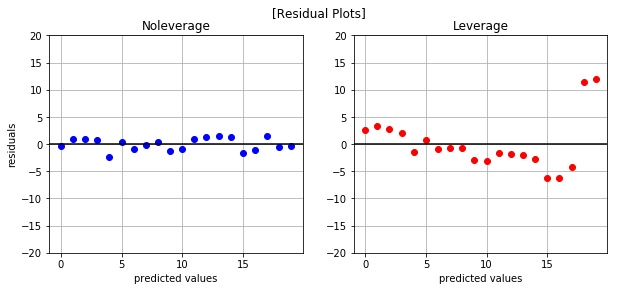

In [64]:
#plotting the residuals
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False , figsize = (10,4))
fig.suptitle('[Residual Plots]')
axes[0].set_ylim(-20,20)
axes[0].plot(x, y-pred_no_lev, 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Noleverage')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].set_ylim(-20,20)
axes[1].plot(x, y_linear_leverage-pred_leverage, 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Leverage')
axes[1].set_xlabel('predicted values')
plt.ylim(-20,20)

## Non linear relationship

In [66]:
np.random.seed(20)
x = np.arange(20)
y = [xx*2 + np.random.rand(1)*4 for xx in range(20)]
x_reshape = x.reshape(-1,1)

In [67]:
linear = LinearRegression()
linear.fit(x_reshape, y)
pred_linear = linear.predict(x_reshape)

In [68]:
y_nonlinear = [x**3 + np.random.rand(1)*10 for x in range(20)]
nonlinear = LinearRegression()
nonlinear.fit(x_reshape, y_nonlinear)
pred_nonlinear = nonlinear.predict(x_reshape)

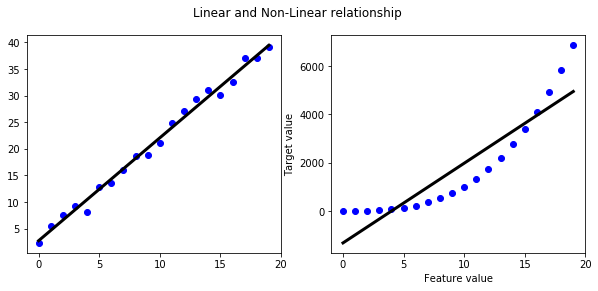

In [69]:
# Plot linear outputs
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, figsize = (10,4))
fig.suptitle('Linear and Non-Linear relationship')
ax1.scatter(x_reshape,y, color='blue')
ax1.plot(x_reshape, pred_linear, color='black', linewidth=3)
plt.xlabel('Feature value', fontdict=None, labelpad=None)
plt.ylabel('Target value', fontdict=None, labelpad=None)
# Plot nonlinear outputs
ax2.scatter(x_reshape,y_nonlinear, color='blue')
ax2.plot(x_reshape, pred_nonlinear, color='black', linewidth=3)
plt.xlabel('Feature value', fontdict=None, labelpad=None)
plt.ylabel('Target value', fontdict=None, labelpad=None)
plt.show()

Text(0.5, 0, 'predicted values')

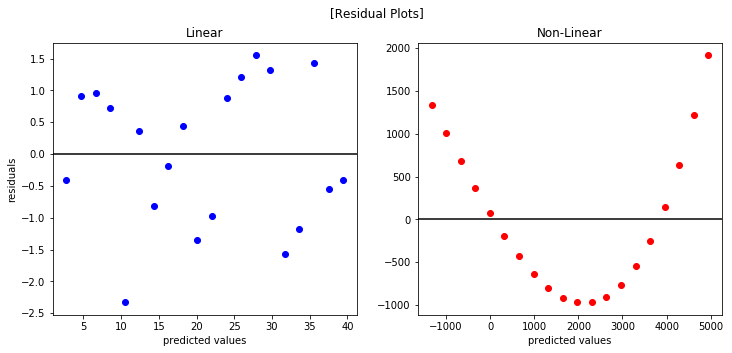

In [71]:
#plotting the residuals
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(12,5)
axes[0].plot(linear.predict(x_reshape), y-linear.predict(x_reshape), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(nonlinear.predict(x_reshape), y_nonlinear-nonlinear.predict(x_reshape), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].set_title('Non-Linear')
axes[1].set_xlabel('predicted values')

<Figure size 432x288 with 0 Axes>

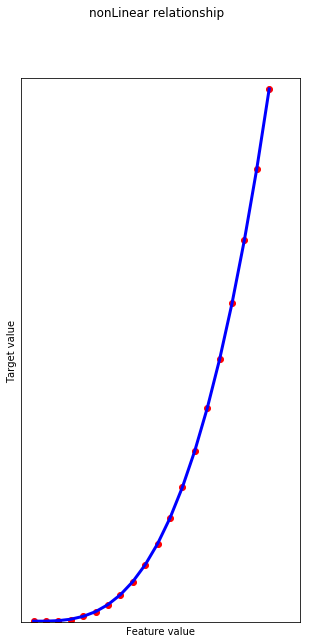

In [75]:
#transformation
#handling the nonlinear data
plt.figure(figsize=(6,4))
poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
('linear', LinearRegression(fit_intercept=False))])
poly.fit(x_reshape, y_nonlinear)
pred3 = poly.predict(x_reshape)
# Plot outputs
fig, axes = plt.subplots(1, 1, sharex=False, sharey=False)
fig.suptitle('nonLinear relationship')
plt.scatter(x_reshape,y_nonlinear, color='red')
plt.plot(x_reshape, pred3, color='blue', linewidth=3)
plt.ylim([0,7000])
plt.xlim([-1.0,21.5])
plt.xticks(())
plt.yticks(())
plt.xlabel('Feature value', fontdict=None, labelpad=None)
plt.ylabel('Target value', fontdict=None, labelpad=None)
plt.show()

In [76]:
#Problem with outliers
#Creating the data
import numpy as np
np.random.seed(20)
x = np.arange(20) ##traindata
y = [xx*2 + np.random.rand(1)*4 for xx in range(20)] #traindata
ytest = [xval*2 + np.random.rand(1)*4 for xval in range(20)] #testdata
y_outlier = list(y)
y_outlier[16] = np.array([80])


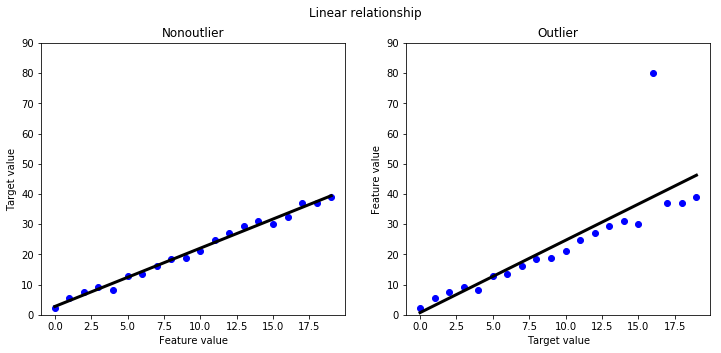

In [79]:
# sklearn expects 2D array so have to reshape x
x_reshape = x.reshape(-1,1)
# fit modelnooutlier data
linear_nooutlier = LinearRegression() ##calling the method
linear_nooutlier.fit(x_reshape, y); ## fit the data with traindata
pred_nooutlier = linear_nooutlier.predict(x_reshape) ##prdict by giving the test data
# fit model with outlier data
linear_outlier = LinearRegression()
linear_outlier.fit(x_reshape, y_outlier);
pred_outlier = linear_outlier.predict(x_reshape)
# Plot outputs
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('Linear relationship')
fig.set_size_inches(12,5)
axes[0].scatter(x_reshape,y, color='blue') #scatter the testdata
axes[0].plot(x_reshape, pred_nooutlier, color='black', linewidth=3) #plot the predicted ones
axes[0].set_title('Nonoutlier')
axes[0].set_xlabel('Feature value')
axes[0].set_ylabel('Target value')
axes[0].set_ylim([0,90])
axes[1].scatter(x_reshape,y_outlier, color='blue')
axes[1].plot(x_reshape, pred_outlier, color='black',linewidth=3, linestyle ='-'
)
#axes[1].scatter(x_reshape1, pred, color='red', marker = 'x')
axes[1].set_title('Outlier')
axes[1].set_xlabel('Feature value')
axes[1].set_ylabel('Target value')
axes[1].set_ylim([0,90])
plt.xlabel('Target value', fontdict=None, labelpad=None)
plt.ylabel('Feature value', fontdict=None, labelpad=None)
plt.show()

## DATASET

In [80]:
diabetes=datasets.load_diabetes()

In [85]:
data=pd.DataFrame(diabetes.data)
data.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


In [86]:
diabetes_X=diabetes.data[:,np.newaxis,2]

In [90]:
type(diabetes_X)

numpy.ndarray

In [91]:
diabetes_X[1:10]

array([[-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215]])

In [92]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
print ("length of train, test", len(diabetes_X_train) , len(diabetes_X_test))

length of train, test 422 20


In [93]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [94]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [96]:
# The coefficients
print('Coefficients:', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
% mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


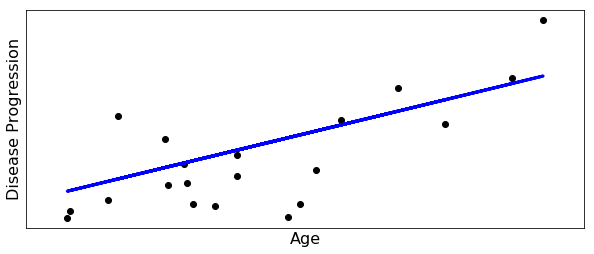

In [98]:
# Plot outputs
plt.figure(figsize = (10,4))
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel("Age" , fontsize = 16)
plt.ylabel("Disease Progression" , fontsize = 16)
plt.show()

############

In [192]:
df=pd.read_csv(r'D:\udemy\50_Startups.csv')

In [193]:
df.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [195]:
df.columns=[['Spend', 'Administration', 'MarketingSpend', 'State', 'Profit']]

In [196]:
df.columns

MultiIndex(levels=[['Administration', 'MarketingSpend', 'Profit', 'Spend', 'State']],
           codes=[[3, 0, 1, 4, 2]])

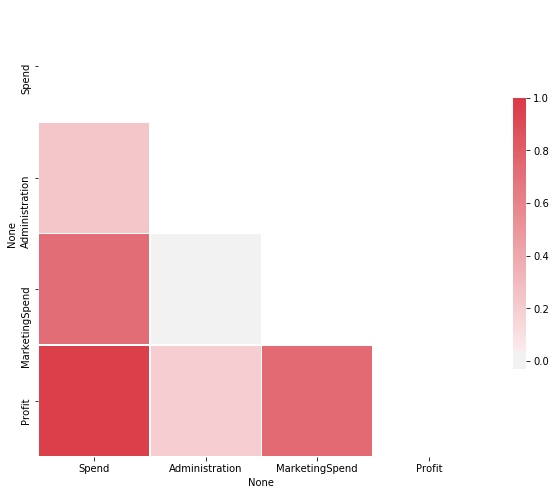

In [197]:
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(10,10))
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,linewidths=.6,cbar_kws={'shrink':.5})

In [199]:
#VIF Calculation
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [200]:
df.head()

,Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [201]:
lr1=LinearRegression()
lr1.fit(df[['Spend']+['Administration']+['MarketingSpend']],df[['Profit']])
prediction1=lr1.predict(df[['Spend']+['Administration']+['MarketingSpend']])
model1=sm.ols(formula='Profit ~ Spend+Administration+MarketingSpend',data=df)
fitted1=model1.fit()
fitted1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           4.53e-30
Time:                        14:23:38   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Spend              0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [186]:
vif_cal(input_data=df,dependent_col='Profit')

C:\Users\rameshsrujana\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


('R&DSpend',)  VIF =  2.47
('Administration',)  VIF =  1.18
('MarketingSpend',)  VIF =  2.33


In [184]:
df.drop('State',axis=1,inplace=True)

In [185]:
df.head()

,R&DSpend,Administration,MarketingSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [187]:
vif_cal(input_data=df.drop(['MarketingSpend'],axis=1),dependent_col='Profit')

('R&DSpend',)  VIF =  1.06
('Administration',)  VIF =  1.06


In [203]:
model2=sm.ols(formula='Profit ~ Spend+Administration',data=df)
fitted2=model2.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           7.29e-31
Time:                        14:25:40   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
Spend              0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\rameshsrujana\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


ValueError: Input passed into argument "'y1'"is not 1-dimensional.

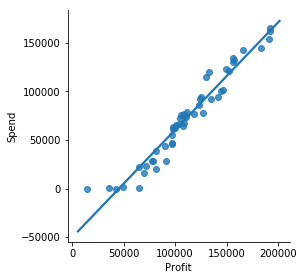

In [212]:
sns.pairplot(df,x_vars=['Profit'],y_vars=['Spend'],diag_kind='hist',size=4,kind='reg')

In [213]:
df1=pd.read_csv(r'D:\marlabs\Datasets\walmart_stock.csv')

In [215]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [216]:
df1=df1[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]

In [217]:
df1.head(3)

,Open,High,Low,Close,Volume,Adj Close
0,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,59.349998,59.619999,58.369999,59.419998,12768200,51.825539


In [218]:
print(df1.isnull().sum())

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [219]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1)
memory usage: 59.0 KB


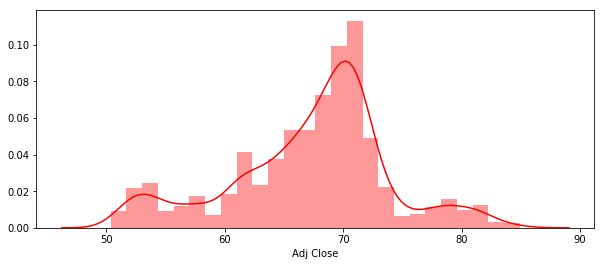

In [224]:
fig,ax=plt.subplots()
fig.set_size_inches(10,4)
sns.distplot(df1['Adj Close'],color='red')
#plt.xlim(0,100)



In [225]:
print('Skewness (before) : ',df1['Adj Close'].skew())
df1['Adj Close'] = np.log(df1['Adj Close'])
print('Skewness (after) : ',df1['Adj Close'].skew())

Skewness (before) :  -0.4028020780400266
Skewness (after) :  -0.7066755517848492


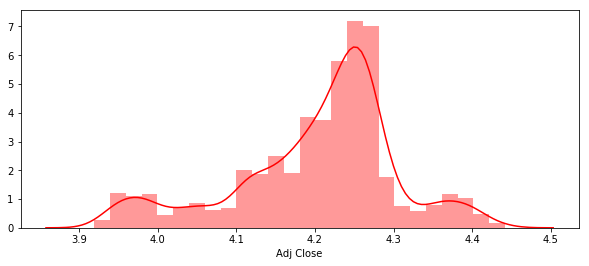

In [226]:
fig,ax=plt.subplots()
fig.set_size_inches(10,4)
sns.distplot(df1['Adj Close'],color='red')

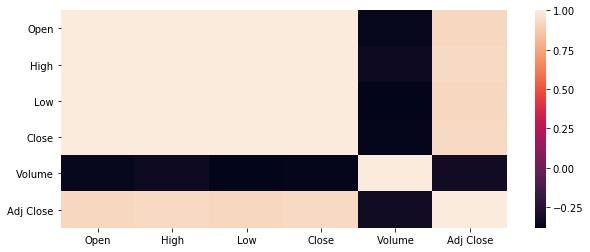

In [227]:
fig,ax=plt.subplots()
correlation=df1.corr()
fig.set_size_inches(10,4)
sns.heatmap(correlation)

In [229]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1[df1.columns[:-1]],

                                                 df1[df1.columns[-1]],test_size=0.20,random_state=42)

In [233]:
df_param=pd.DataFrame()
l_reg=LinearRegression()
l_reg.fit(x_train,y_train)

print(l_reg.intercept_)
df_param['Linear_regression']=l_reg.coef_

3.1709221175540105


In [234]:
from sklearn.linear_model import Ridge
l_ridge = Ridge(alpha=0.5)
l_ridge.fit(x_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [235]:
print('Intercept Coefficient : ', l_ridge.intercept_)
df_param['Ridge'] = l_ridge.coef_

Intercept Coefficient :  3.170828607521033


In [236]:
from sklearn.linear_model import Lasso
l_lasso = Lasso(alpha=0.1)
l_lasso.fit(x_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [237]:
print('Intercept Coefficient : ', l_lasso.intercept_)
df_param['Lasso_Regression'] = l_lasso.coef_

Intercept Coefficient :  3.3619526688974437


In [238]:
l_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

## Parameter Tuning

In [240]:
from sklearn.model_selection import GridSearchCV
params={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False]}
grid=GridSearchCV(l_reg,params,cv=None,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
print('Mean squared error: ', grid.best_score_)
print('Residual sum of squares: ',np.mean((grid.predict(x_test)-y_test)**2))
l_reg=grid.best_estimator_
print(grid.best_estimator_)

C:\Users\rameshsrujana\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Mean squared error:  -0.0014520951448529582
Residual sum of squares:  0.001365681769801149
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [241]:
params={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid = GridSearchCV(l_ridge,params, cv=2, scoring = 'neg_mean_squared_error')
grid.fit(x_train, y_train)
print("Mean Squared Error: ", grid.best_score_)
print("Residual sum of squares: %.2f"% np.mean((grid.predict(x_test) - y_test)
** 2))
print(grid.best_estimator_)
l_ridge = grid.best_estimator_

Mean Squared Error:  -0.0014313610327988436
Residual sum of squares: 0.00
Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [242]:
params={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid = GridSearchCV(l_lasso,params, cv=2, scoring = 'neg_mean_squared_error')
grid.fit(x_train, y_train)
print("Mean Squared Error: ", grid.best_score_)
print("Residual sum of squares: %.2f"% np.mean((grid.predict(x_test) - y_test)
** 2))
print(grid.best_estimator_)
l_lasso = grid.best_estimator_

Mean Squared Error:  -0.0014400898950074378
Residual sum of squares: 0.00
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [244]:
max_coef = max(df_param['Linear_regression'])
df_param[df_param['Linear_regression'] == max_coef]

,Linear_regression,Ridge,Lasso_Regression
1,0.01393,0.013846,0.011713


In [246]:
from sklearn.model_selection import cross_validate
scoring = {'neg_mean_absolute_error',
'neg_mean_squared_error',
'r2'}
#x = pd.concat([x_train,x_test])
#y = pd.concat([y_train,y_test])
df_scores = pd.DataFrame()
for model in [l_reg,l_ridge,l_lasso]:
    scores = cross_validate(l_reg,x_train,y_train,scoring=scoring,cv=5, return_train_score=True)
    score = []
    for key in scores.keys():
        score.append(scores[key].mean())
    df_scores[str(model)] = score
    df_scores['metric_params'] = scores.keys()
df_scores = df_scores.set_index('metric_params')

In [247]:
df_scores

,"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)","Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False, random_state=None, solver='auto', tol=0.001)","Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False, positive=False, precompute=False, random_state=None, selection='cyclic', tol=0.0001, warm_start=False)"
metric_params,,,
fit_time,0.005204,0.003602,0.002602
score_time,0.005603,0.004402,0.003802
test_neg_mean_squared_error,-0.001442,-0.001442,-0.001442
train_neg_mean_squared_error,-0.001422,-0.001422,-0.001422
test_r2,0.862489,0.862489,0.862489
train_r2,0.865342,0.865342,0.865342
test_neg_mean_absolute_error,-0.031757,-0.031757,-0.031757
train_neg_mean_absolute_error,-0.031563,-0.031563,-0.031563


In [252]:
b=[5]
a=[1,2,3]
b+=a

In [253]:
b

[5, 1, 2, 3]

In [254]:
np.log10(10)

1.0